# Regression and Other Stories: Fake midterm and final exam

In [2]:
import arviz as az
from bambi import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Simulate fake data

In [3]:
n = 1000
true_ability = stats.norm(50, 10).rvs(n)
noise_1 = stats.norm(0, 10).rvs(n)
noise_2 = stats.norm(0, 10).rvs(n)
midterm = true_ability + noise_1
final = true_ability + noise_2

exams = pd.DataFrame({"midterm":midterm, "final":final})

### Linear Regression

In [4]:
model = Model(exams)
results = model.fit('final ~ midterm', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [final_sd, midterm, Intercept]
INFO:pymc3:NUTS: [final_sd, midterm, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [5]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],26.27,1.00
midterm[0],0.49,0.02
final_sd,12.13,0.19


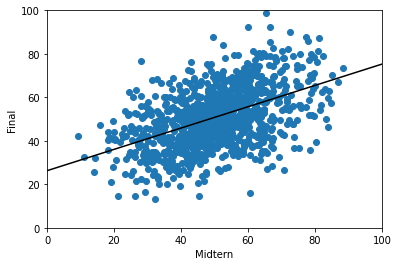

In [6]:
fig, ax = plt.subplots()
ax.scatter(midterm, final)
ax.set_xlabel("Midtern")
ax.set_ylabel("Final")
x = np.array([0, 100])

a_hat = coefs.loc["Intercept[0]", "Median"]
b_hat = coefs.loc["midterm[0]", "Median"]

ax.plot(x, a_hat+b_hat*x, c="black")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100);